# Image Segmentation
Thomas Tran

In [1]:
import matplotlib.pyplot as plt
import cv2

In [2]:
import numpy as np
import os
import pickle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Read in Data/ Preprocessing

In [ ]:
# lst = os.listdir('/content/drive/MyDrive/sample images/Train_Labels/double_plant')
# len(lst)

8000

In [ ]:
# np.random.seed(10)
# rand_nums = np.random.choice([i for i in range(8000)],1000,replace=False)

In [ ]:
# len(rand_nums)

1000

In [ ]:
# train_images = []
# for i in lst:
#     temp = cv2.imread('train/images/'+i.replace('png','jpg'))
#     train_images.append(temp)

In [ ]:
# with open('train.pickle','wb') as file:
#     pickle.dump(train_images,file)

In [ ]:
# %%time
# with open('train.pickle','rb') as file:
#     train_images = pickle.load(file)

In [ ]:
# temp = []
# for i in rand_nums:
#     temp.append(train_images[i])

NameError: ignored

In [ ]:
# train_images = temp

In [ ]:
# with open('subset_train.pickle','wb') as file:
#     pickle.dump(train_images,file)

In [3]:
with open('/content/drive/MyDrive/DATA4380_Group-Project/subset_train.pickle','rb') as file:
    train_images = pickle.load(file)

In [4]:
train_images = np.array(train_images)

In [5]:
train_images = train_images[:150]

In [6]:
train_images.shape

(150, 512, 512, 3)

In [ ]:
# %%time
# with open('first_2000.pickle','rb') as file:
#     first = pickle.load(file)
# with open('2000-4000.pickle','rb') as file:
#     second = pickle.load(file)
# with open('4000-6000.pickle','rb') as file:
#     third = pickle.load(file)
# with open('6000-8000.pickle','rb') as file:
#     fourth = pickle.load(file)

In [ ]:
# all_mask = first+second+third+fourth

In [ ]:
# temp = []
# for i in rand_nums:
#     temp.append(all_mask[i])

In [ ]:
# all_mask = temp

In [ ]:
# with open('subset_mask.pickle','wb') as file:
#     pickle.dump(all_mask,file)

In [7]:
%%time
with open('/content/drive/MyDrive/DATA4380_Group-Project/subset_mask.pickle','rb') as file:
    all_mask = pickle.load(file)

CPU times: user 72 ms, sys: 1.94 s, total: 2.01 s
Wall time: 8.42 s


In [8]:
all_mask = np.array(all_mask)

In [9]:
all_mask = all_mask[:150]

In [10]:
all_mask.shape

(150, 512, 512)

In [ ]:
# lst_folders = ['train/labels/double_plant/','train/labels/drydown/','train/labels/endrow/',
#                'train/labels/nutrient_deficiency/','train/labels/planter_skip/','train/labels/storm_damage/',
#                'train/labels/water/','train/labels/waterway/','train/labels/weed_cluster/']

In [ ]:
# dictionary = dict(zip(lst_folders,[i+1 for i in range(len(lst_folders))]))
# dictionary

{'train/labels/double_plant/': 1,
 'train/labels/drydown/': 2,
 'train/labels/endrow/': 3,
 'train/labels/nutrient_deficiency/': 4,
 'train/labels/planter_skip/': 5,
 'train/labels/storm_damage/': 6,
 'train/labels/water/': 7,
 'train/labels/waterway/': 8,
 'train/labels/weed_cluster/': 9}

In [ ]:
num = 999

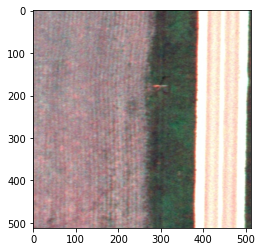

In [ ]:
# plt.imshow(cv2.imread('/content/drive/MyDrive/sample images/samples_train/train images/'+lst[rand_nums[num]].replace('png','jpg')))
# plt.show()

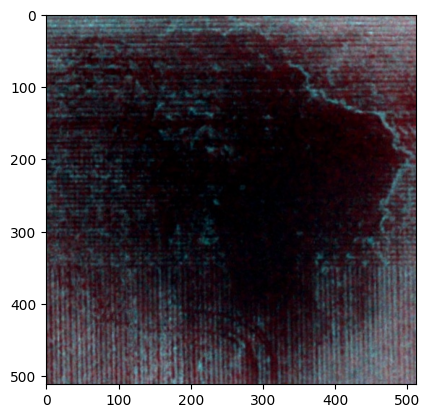

In [ ]:
plt.imshow(train_images[num])
plt.show()

In [ ]:
np.unique(all_mask[num])

array([0., 7.])

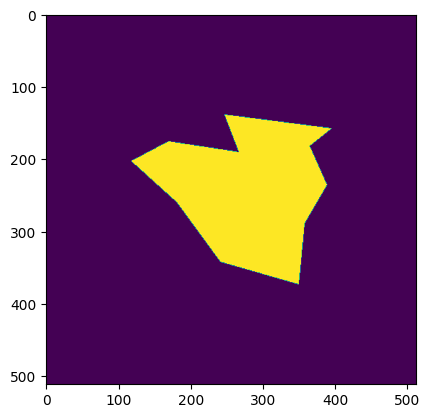

In [ ]:
plt.imshow(all_mask[num])
plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
n, h, w = all_mask.shape
train_masks_reshaped = all_mask.reshape(-1,1)
train_masks_reshaped_encoded = labelencoder.fit_transform(train_masks_reshaped)
train_masks_encoded_original_shape = train_masks_reshaped_encoded.reshape(n, h, w)

np.unique(train_masks_encoded_original_shape)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [13]:
train_masks_input = np.expand_dims(train_masks_encoded_original_shape, axis=3)

In [14]:
from sklearn.model_selection import train_test_split

In [9]:
# !pip install -U segmentation-models

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 6.2 MB/s eta 0:00:00


In [15]:
import segmentation_models as sm
import tensorflow as tf
import cv2

Segmentation Models: using `keras` framework.


In [16]:
X1, X_test, y1, y_test = train_test_split(train_images, train_masks_input, test_size = 0.10, random_state = 0)

In [17]:
# X_train, X_do_not_use, y_train, y_do_not_use = train_test_split(X1, y1, test_size = 0.5, random_state = 0)

In [18]:
print("Class values in the dataset are ... ", np.unique(y1))

Class values in the dataset are ...  [0 1 2 3 4 5 6 7 8 9]


In [19]:
from keras.utils import to_categorical

In [20]:
SIZE_X = 512 
SIZE_Y = 512
n_classes = 10

In [21]:
y1.shape

(135, 512, 512, 1)

In [22]:
train_masks_cat = to_categorical(y1)
y_train_cat = train_masks_cat.reshape((y1.shape[0], y1.shape[1], y1.shape[2], n_classes))

In [23]:
test_masks_cat = to_categorical(y_test)
y_test_cat = test_masks_cat.reshape((y_test.shape[0], y_test.shape[1], y_test.shape[2], n_classes))

## Model Training

In [24]:
import keras

In [73]:
n_classes=10
activation='softmax'

LR = 0.0001
optim = keras.optimizers.Adam(LR)

# Segmentation models losses can be combined together by '+' and scaled by integer or float factor
# set class weights for dice_loss (car: 1.; pedestrian: 2.; background: 0.5;)
dice_loss = sm.losses.DiceLoss(class_weights=np.array([0.01]+[0.11 for i in range(9)])) 
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)

metrics = [sm.metrics.IOUScore(threshold=0.5), sm.metrics.FScore(threshold=0.5)]

### Model1

In [74]:
BACKBONE1 = 'resnet34'
preprocess_input1 = sm.get_preprocessing(BACKBONE1)

X_train1 = preprocess_input1(X1)
X_test1 = preprocess_input1(X_test)

In [75]:
model1 = sm.Unet(BACKBONE1, encoder_weights='imagenet', classes=n_classes, activation=activation)

model1.compile(optim, total_loss, metrics=metrics)

print(model1.summary())

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 data (InputLayer)              [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 bn_data (BatchNormalization)   (None, None, None,   9           ['data[0][0]']                   
                                3)                                                                
                                                                                                  
 zero_padding2d_34 (ZeroPadding  (None, None, None,   0          ['bn_data[0][0]']                
 2D)                            3)                                                          

In [76]:
X_train1.shape

(135, 512, 512, 3)

In [77]:
y_train_cat.shape

(135, 512, 512, 10)

In [78]:
history1=model1.fit(X_train1,
          y_train_cat,
          batch_size=5, 
          epochs=50,
          verbose=1,
          validation_data=(X_test1, y_test_cat))

Epoch 1/50
27/27 [==============================] - 18s 461ms/step - loss: 1.0473 - iou_score: 0.0825 - f1-score: 0.0835 - val_loss: 1.1615 - val_iou_score: 0.3333 - val_f1-score: 0.3333
Epoch 2/50
27/27 [==============================] - 11s 425ms/step - loss: 1.0380 - iou_score: 0.2468 - f1-score: 0.2489 - val_loss: 1.1606 - val_iou_score: 0.3496 - val_f1-score: 0.3577
Epoch 3/50
27/27 [==============================] - 11s 409ms/step - loss: 1.0309 - iou_score: 0.4314 - f1-score: 0.4379 - val_loss: 1.1055 - val_iou_score: 0.3520 - val_f1-score: 0.3613
Epoch 4/50
27/27 [==============================] - 11s 403ms/step - loss: 1.0258 - iou_score: 0.4879 - f1-score: 0.4950 - val_loss: 1.0775 - val_iou_score: 0.4171 - val_f1-score: 0.4265
Epoch 5/50
27/27 [==============================] - 11s 404ms/step - loss: 1.0212 - iou_score: 0.5168 - f1-score: 0.5273 - val_loss: 1.0462 - val_iou_score: 0.4181 - val_f1-score: 0.4296
Epoch 6/50
27/27 [==============================] - 11s 407ms/ste

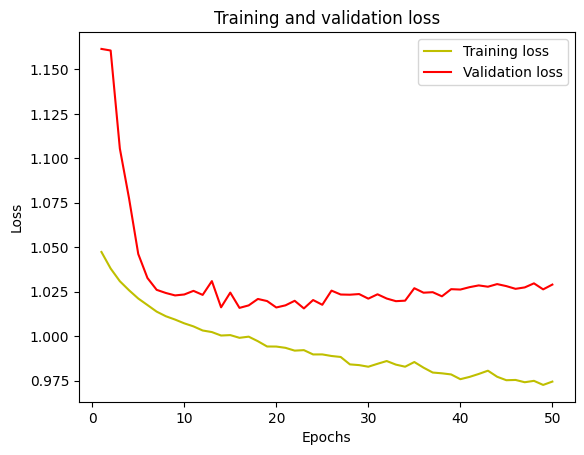

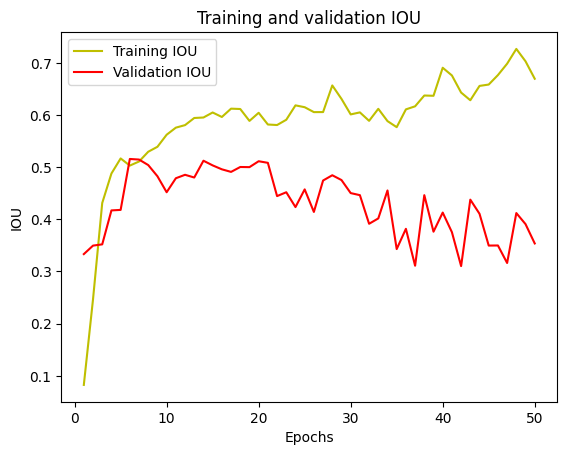

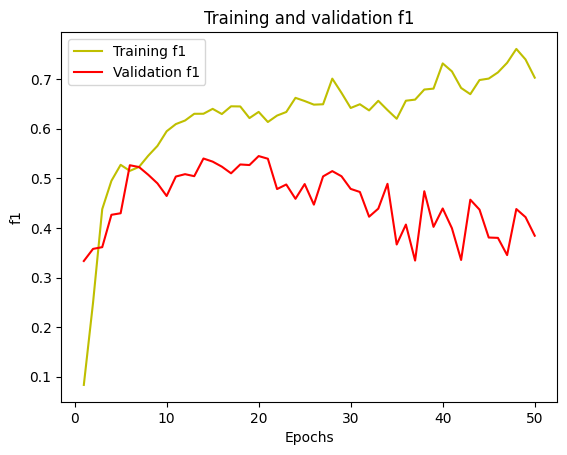

In [80]:
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history1.history['iou_score']
val_acc = history1.history['val_iou_score']

plt.plot(epochs, acc, 'y', label='Training IOU')
plt.plot(epochs, val_acc, 'r', label='Validation IOU')
plt.title('Training and validation IOU')
plt.xlabel('Epochs')
plt.ylabel('IOU')
plt.legend()
plt.show()

f1 = history1.history['f1-score']
val_f1 = history1.history['val_f1-score']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, f1, 'y', label='Training f1')
plt.plot(epochs, val_f1, 'r', label='Validation f1')
plt.title('Training and validation f1')
plt.xlabel('Epochs')
plt.ylabel('f1')
plt.legend()
plt.show()

In [81]:
prediction = model1.predict(X_test1)

1/1 [==============================] - 1s 919ms/step


In [87]:
prediction[0][0][1]

array([0.7107522 , 0.02249133, 0.03290424, 0.02161159, 0.03296743,
       0.0362279 , 0.04364666, 0.02757226, 0.02579759, 0.04602877],
      dtype=float32)

In [92]:
y_test_cat[0]

array([[[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0.

In [50]:
np.where(np.max(prediction[0][0][0]))[0][0]

0

In [93]:
lst3 = []
for k in range(15):
  lst2 = []
  for i in range(len(prediction[0])):
    lst1 = []
    for j in range(len(prediction[0][0])):
     lst1.append(np.where(np.max(prediction[k][i][j]))[0][0])
    lst2.append(lst1)
  lst3.append(np.array(lst2))
lst4 = []
for k in range(15):
  lst2 = []
  for i in range(len(prediction[0])):
    lst1 = []
    for j in range(len(prediction[0][0])):
     lst1.append(np.where(np.max(y_test_cat[k][i][j]))[0][0])
    lst2.append(lst1)
  lst4.append(np.array(lst2))

In [102]:
lst3[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

<ipython-input-96-d63fc7ff653b>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,2)


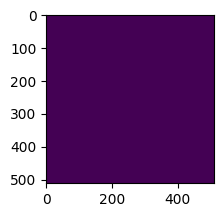

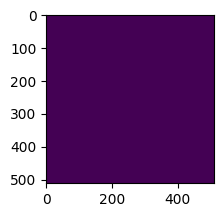

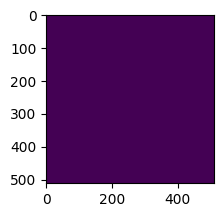

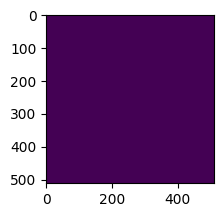

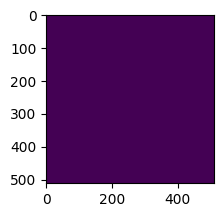

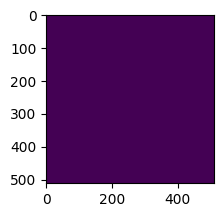

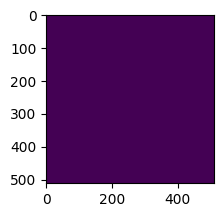

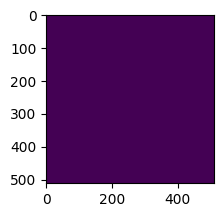

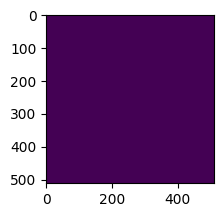

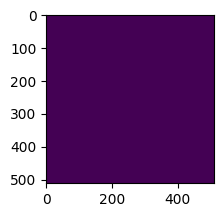

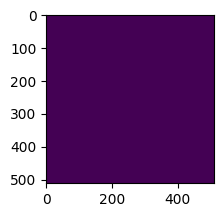

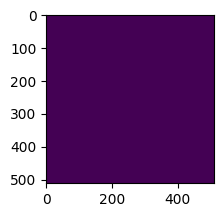

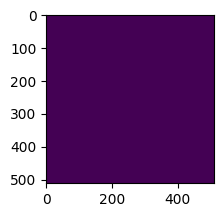

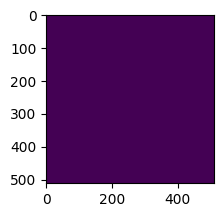

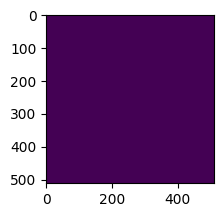

In [96]:
for i in range(15):
  plt.subplot(1,2,1)
  plt.imshow(lst3[i])
  plt.subplot(2,1,2)
  plt.imshow(lst4[i])
  plt.show()

# Citations:

https://github.com/bnsreenu/python_for_microscopists

https://github.com/qubvel/segmentation_models

